# **Soccer Player Detectiion** 

In [48]:
import torch
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [49]:
model = YOLO("LaunchHacks-main\\best.pt")

In [50]:
def inference(x):
    result = model(x)
    return result

In [69]:
def draw_bboxes(results):
  for result in results:
    img = result.orig_img
    boxes = result.boxes.xyxy
    classes = [int(i) for i in result.boxes.cls]
    class_names = [result.names[i] for i in classes]

    print(class_names)

    for i,bbox in enumerate(boxes):
      start = (round(float(bbox[0])),round(float(bbox[1])))
      end = (round(float(bbox[2])),round(float(bbox[3])))
      color = (255,0,0)
      img = cv2.rectangle(img, start, end, color, 2)
      img = cv2.putText(img, class_names[i], start, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    return img

0: 384x640 14 players, 177.2ms
Speed: 3.8ms preprocess, 177.2ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)
['player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player']


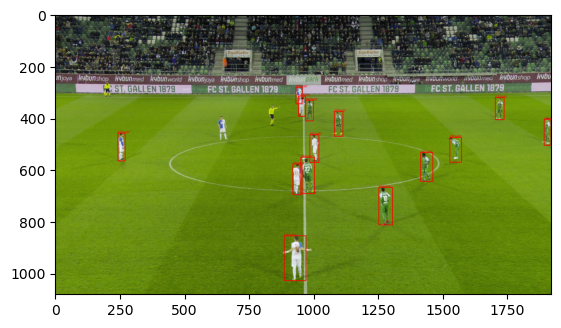

In [70]:
with Image.open("SNGS-060\images\\000009.jpg") as img:
    img = np.array(img)
    result = inference(img)
plt.imshow(draw_bboxes(result))

In [73]:
def vid_inference(path):
    cap = cv2.VideoCapture(path)

    while cap.isOpened():
        ret, frame = cap.read()
        result = model(frame)
        cv2.imshow('frame',draw_bboxes(result))



In [74]:
vid_inference("inference_vid.webm")


0: 384x640 15 players, 2 referees, 140.4ms
Speed: 4.2ms preprocess, 140.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


['player', 'player', 'player', 'player', 'player', 'player', 'referee', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'referee']


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
